Implementing SVM


importing required libraries:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# Load the dataset
df = pd.read_csv('/content/cleaned_data_DX.csv')

In [ ]:
print(df)


     Gender  Age Handedness  DX  ADHD Measure  ADHD Index  Inattentive  \
0         1   17          1   0             2        52.0         52.0   
1         1   16          1   0             2        30.0         29.0   
2         0   15          1   0             2        30.0         29.0   
3         0   15          1   0             2        30.0         29.0   
4         1   17          0   0             2        52.0         52.0   
..      ...  ...        ...  ..           ...         ...          ...   
545       1   12          1   0             2        23.0         22.0   
546       1   14          1   0             2        30.0         29.0   
547       0   13          0   0             2        23.0         22.0   
548       1   16          1   0             2        30.0         29.0   
549       0   10          1   0             2        37.0         41.0   

     Hyper/Impulsive  IQ Measure  Verbal IQ  Performance IQ  Full4 IQ  \
0               50.0           2      

In [ ]:
df_filled = df.apply(lambda x: x.fillna(x.mode()[0]))

In [ ]:
# Count the number of missing values in each column
missing_values = df_filled.isnull().sum()

# Print the missing values count
print("Missing values in the DataFrame:")
print(missing_values)


Missing values in the DataFrame:
Gender             0
Age                0
Handedness         0
DX                 0
ADHD Measure       0
ADHD Index         0
Inattentive        0
Hyper/Impulsive    0
IQ Measure         0
Verbal IQ          0
Performance IQ     0
Full4 IQ           0
Med Status         0
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# Iterate over each column
for column in df.columns:
    # Check if the column contains any non-numeric values
    non_numeric_values = df[column].loc[~pd.to_numeric(df[column], errors='coerce').notnull()]

    # If there are non-numeric values in the column, print the column name and the non-numeric values
    if not non_numeric_values.empty:
        print(f"Column '{column}' contains non-numeric values:")
        print(non_numeric_values)


Column 'Handedness' contains non-numeric values:
454    L
Name: Handedness, dtype: object


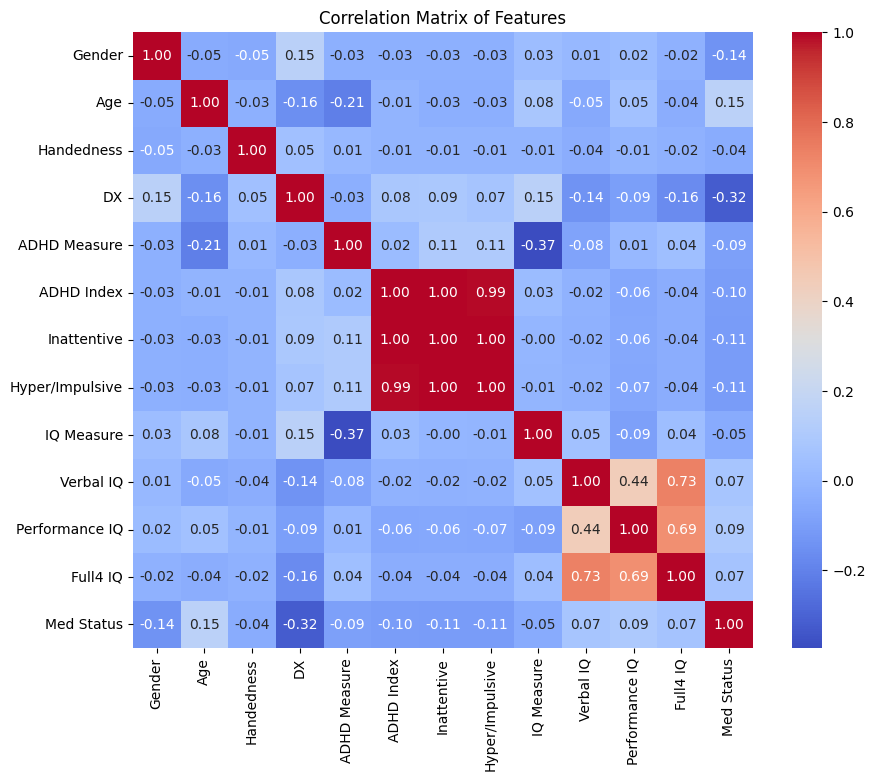

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Let's say you have identified the problematic column as 'Column_Name'
# You can replace 'Column_Name' with the actual column name from your DataFrame
df = df[~df['Handedness'].str.contains('L')]

# Now, let's convert the DataFrame to numeric where possible
# This will try to convert columns to numeric, and if conversion fails, it will coerce the values to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Now, let's drop rows with NaN values
df = df.dropna()

# Visualize the correlation matrix of features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

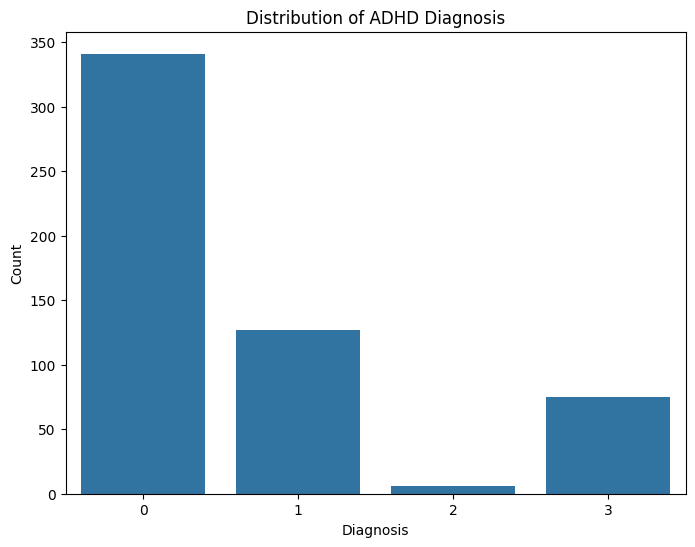

In [ ]:
# Visualize the distribution of the target variable (DX)
plt.figure(figsize=(8, 6))
sns.countplot(x='DX', data=df)
plt.title('Distribution of ADHD Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()



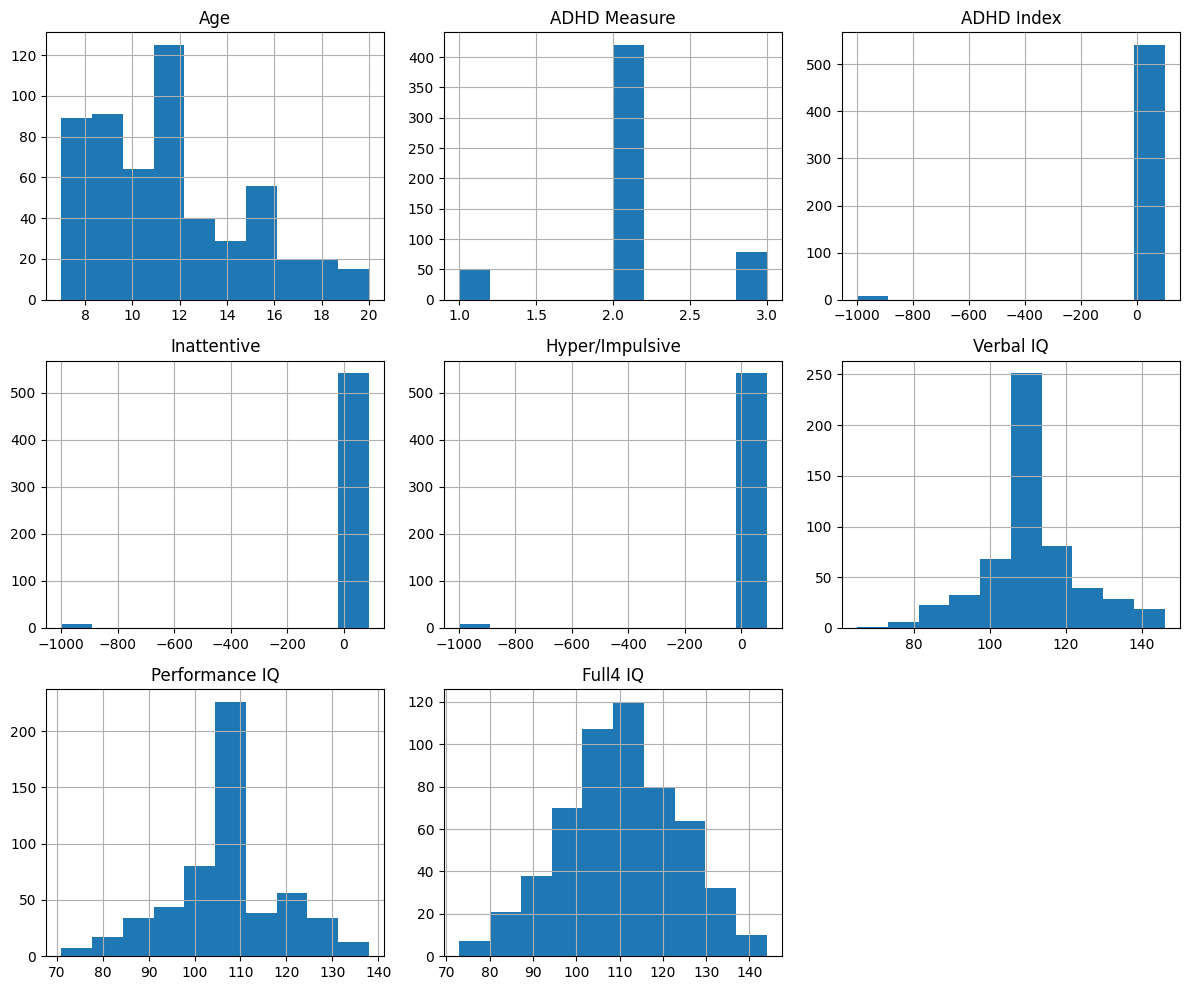

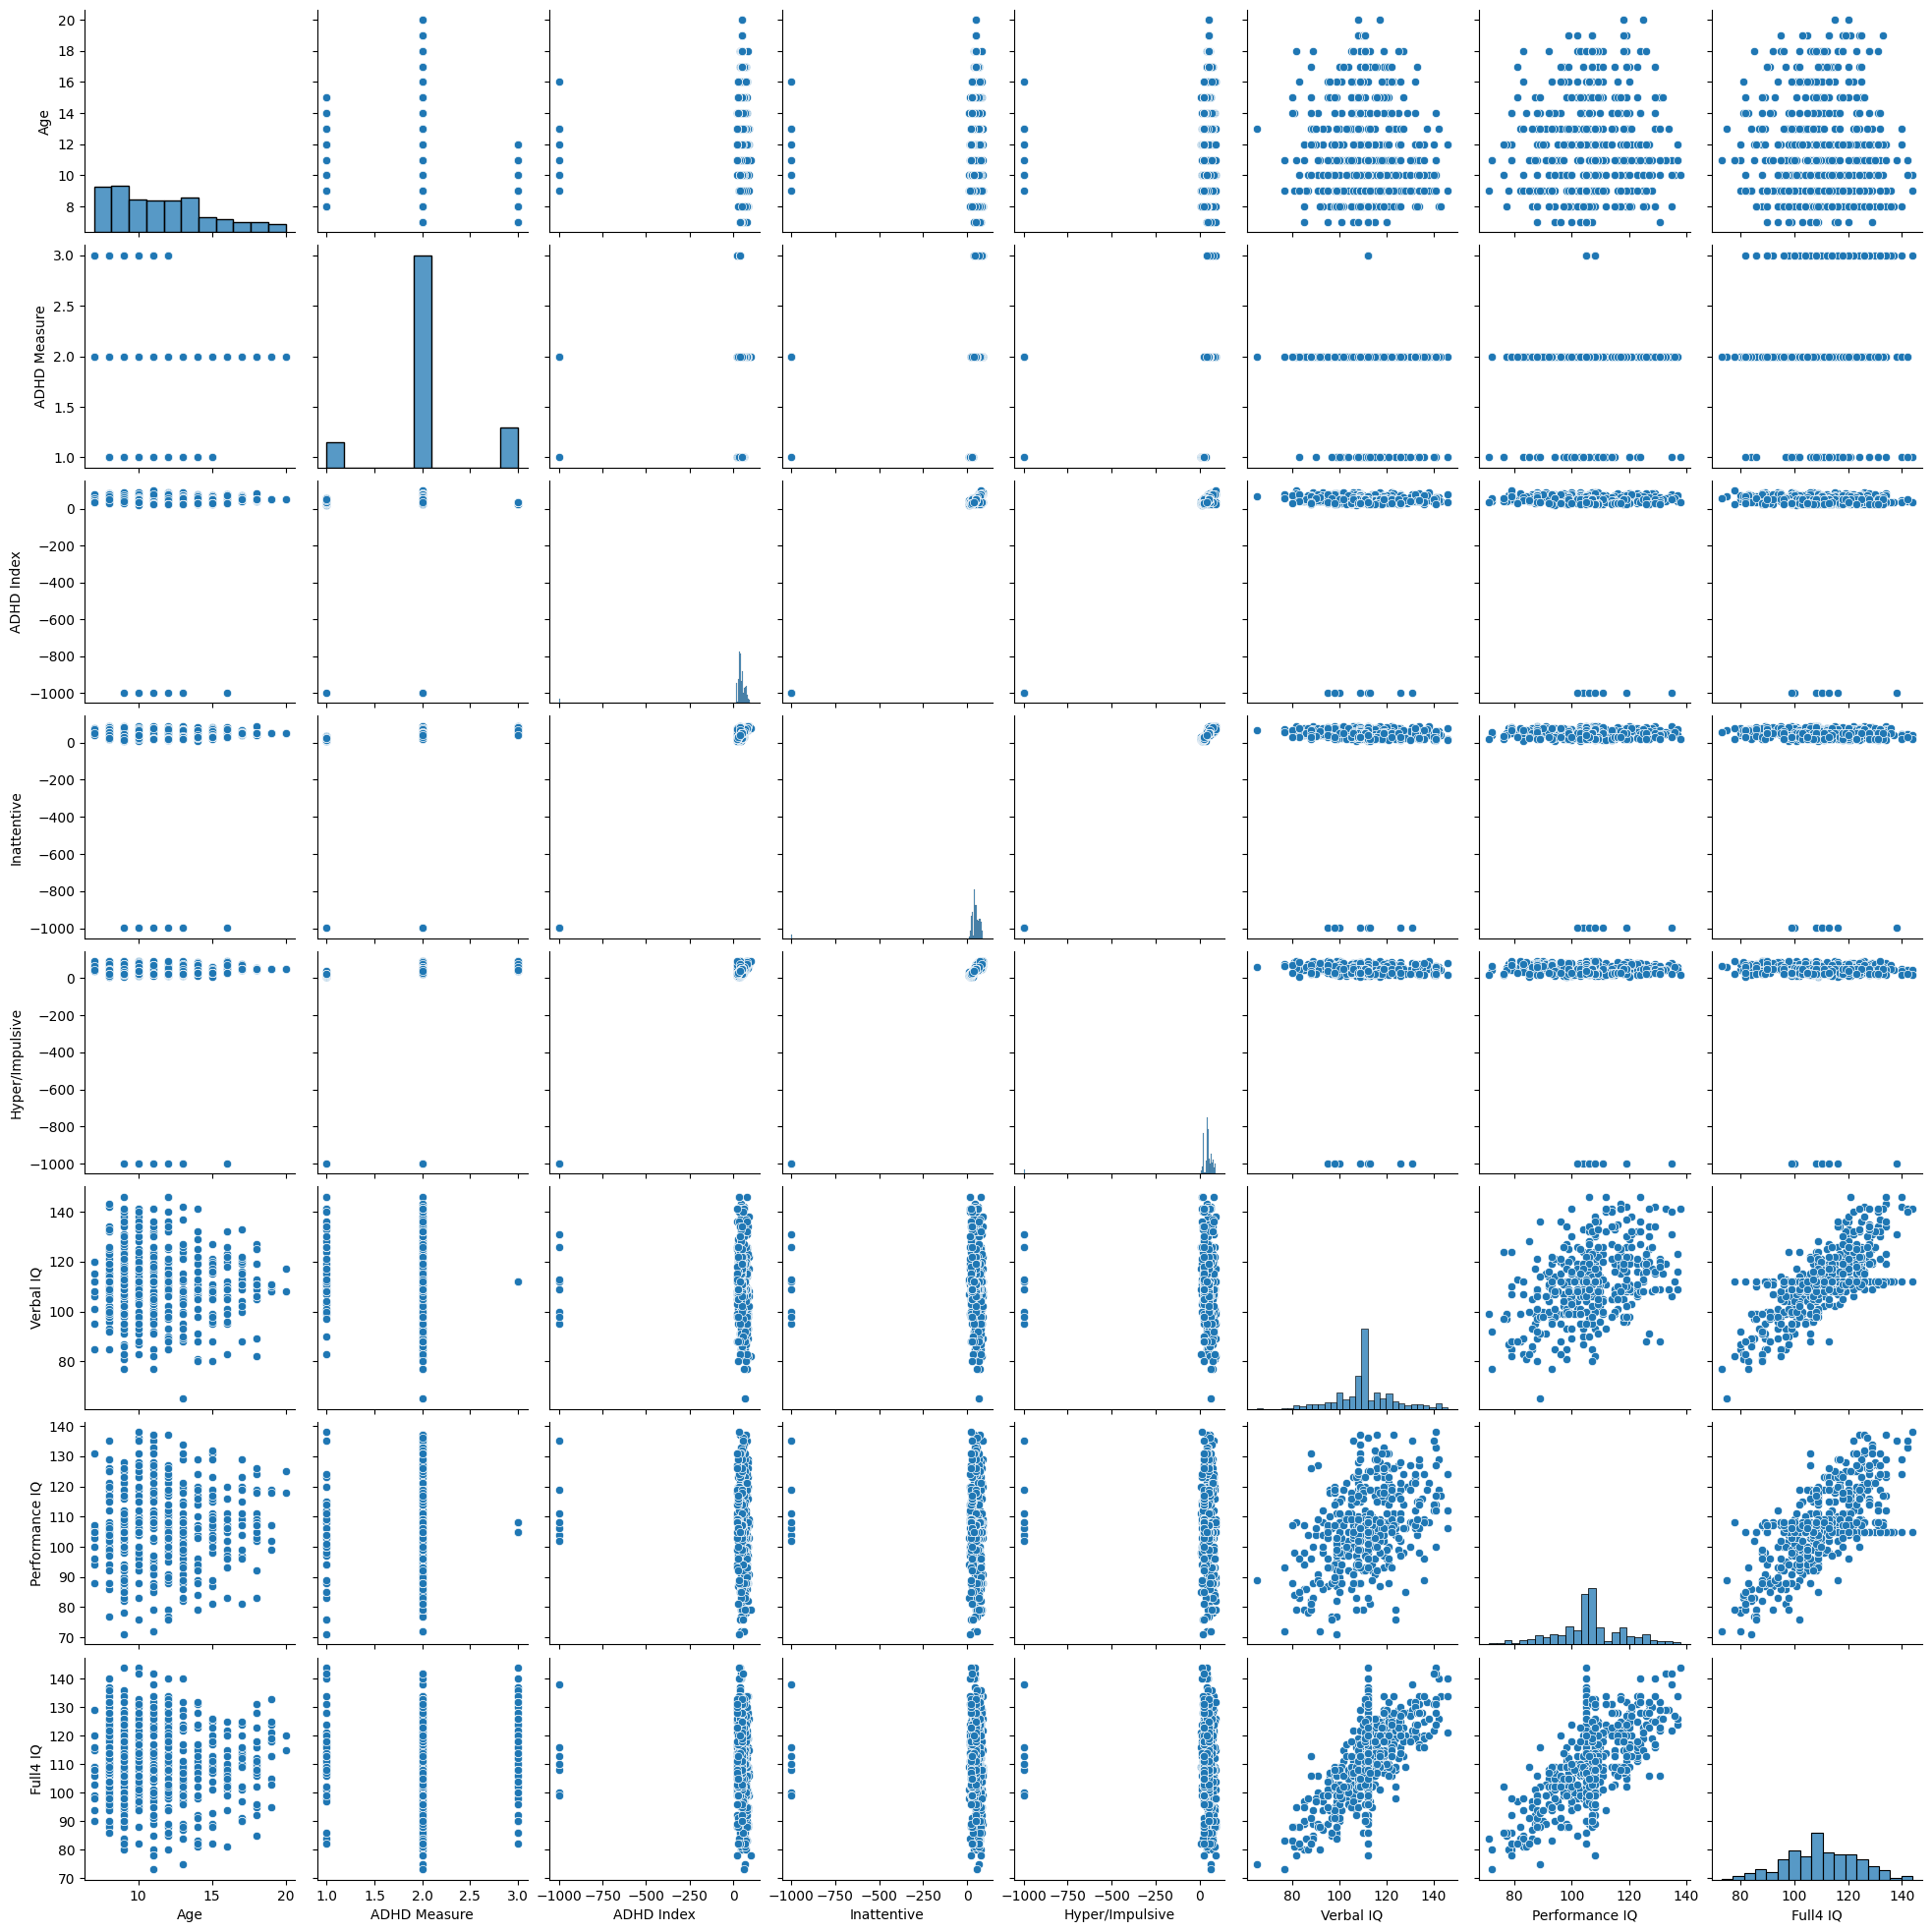

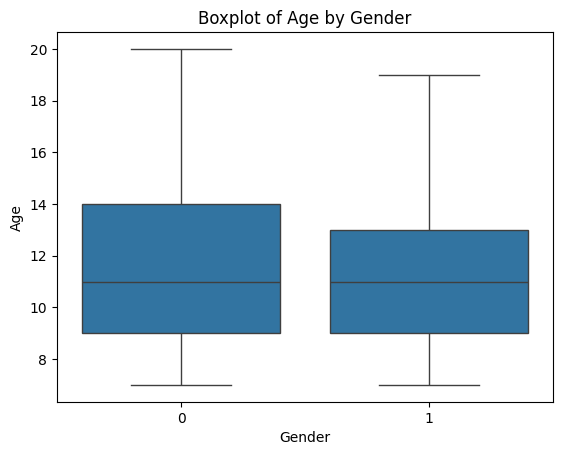

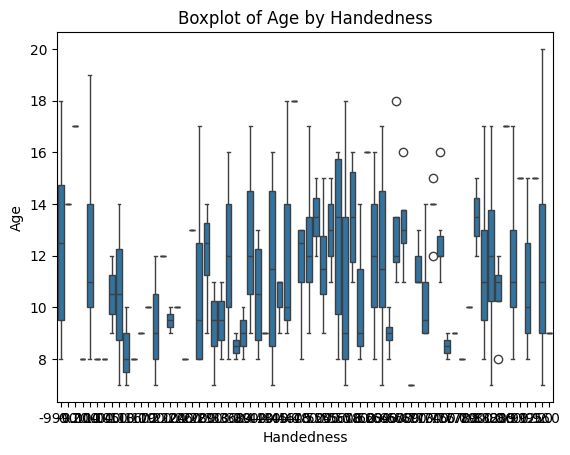

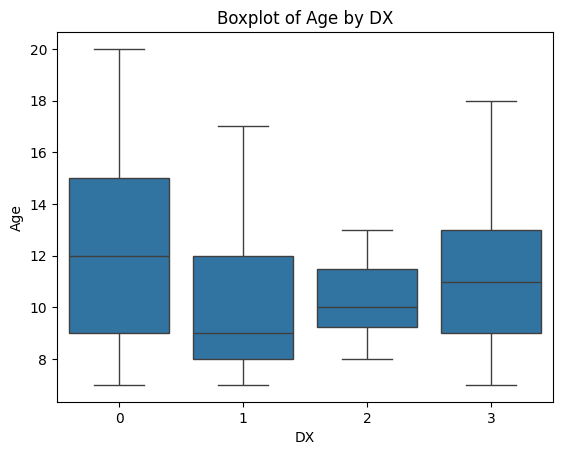

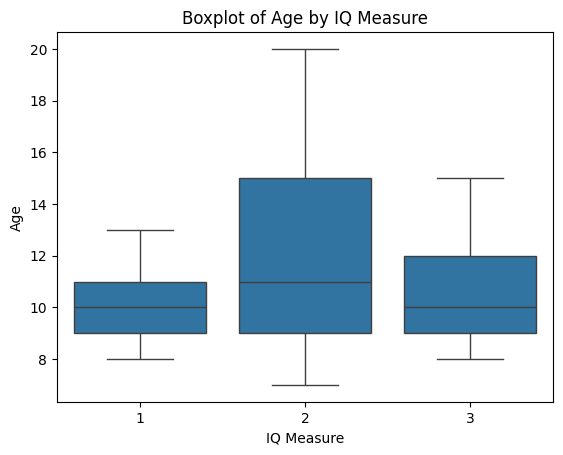

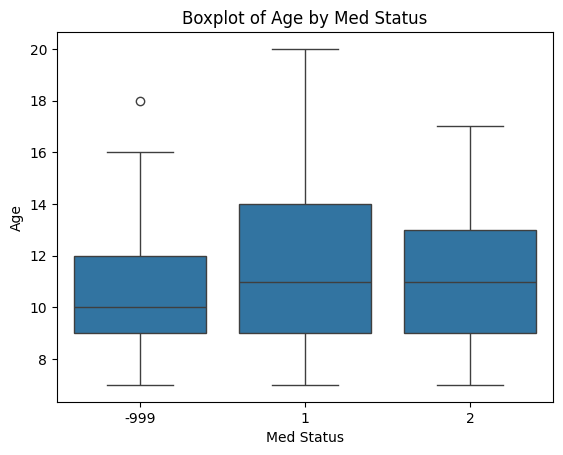

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numeric features
numeric_features = ['Age', 'ADHD Measure', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive',
                    'Verbal IQ', 'Performance IQ', 'Full4 IQ']
data_numeric = df[numeric_features]
data_numeric.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Plot scatter matrix for numeric features
sns.pairplot(data_numeric)
plt.show()

# Plot box plots for categorical features
categorical_features = ['Gender', 'Handedness', 'DX', 'IQ Measure', 'Med Status']
for feature in categorical_features:
    sns.boxplot(x=feature, y='Age', data=df)
    plt.title(f'Boxplot of Age by {feature}')
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features (X) and target variable (y)
X = df.drop(columns=['DX'])  # Features
y = df['DX']                  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numeric features
categorical_features = ['Gender', 'Handedness']
numeric_features = ['Age', 'ADHD Measure', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive',
                    'Verbal IQ', 'Performance IQ', 'Full4 IQ']

# Define preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(categories='auto', handle_unknown='ignore')  # Specify categories and handle unknown

# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define pipeline with preprocessing and scaling steps
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the training data
X_train_scaled = pipeline.fit_transform(X_train)

# Transform the testing data
X_test_scaled = pipeline.transform(X_test)


In [ ]:
# Number of original numeric features
num_numeric_features = len(numeric_features)
print(num_numeric_features)
# Number of unique categories in each categorical feature
num_categories = X_train[categorical_features].nunique()
print(num_categories)
# Total number of binary features after one-hot encoding
# num_binary_features = sum(num_categories)
# print(num_binary_features)
# Total number of features after preprocessing
total_features_after_preprocessing = num_numeric_features + num_categories

print("Total number of features after preprocessing:", total_features_after_preprocessing)


8
Gender         2
Handedness    64
dtype: int64
Total number of features after preprocessing: Gender        10
Handedness    72
dtype: int64


Checking if there is any null values left:

In [ ]:
# Check for NaN values in the training data
print("NaN values in training data:")
print(X_train.isnull().sum())

# Check for NaN values in the testing data
print("NaN values in testing data:")
print(X_test.isnull().sum())


NaN values in training data:
Gender             0
Age                0
Handedness         0
ADHD Measure       0
ADHD Index         0
Inattentive        0
Hyper/Impulsive    0
IQ Measure         0
Verbal IQ          0
Performance IQ     0
Full4 IQ           0
Med Status         0
dtype: int64
NaN values in testing data:
Gender             0
Age                0
Handedness         0
ADHD Measure       0
ADHD Index         0
Inattentive        0
Hyper/Impulsive    0
IQ Measure         0
Verbal IQ          0
Performance IQ     0
Full4 IQ           0
Med Status         0
dtype: int64


Training the model and evaluation:

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize SVM classifier
svm_model = SVC()

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
y_pred = svm_model.predict(X_test_scaled)

# Predict the target variable on the training set
y_train_pred = svm_model.predict(X_train_scaled)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(" Testing Accuracy:", accuracy)

print("\nClassification Report for Testing Data:")
print(classification_report(y_test, y_pred))


Training Accuracy: 0.7425968109339408
 Testing Accuracy: 0.8

Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87        76
           1       0.79      0.62      0.70        24
           3       0.00      0.00      0.00        10

    accuracy                           0.80       110
   macro avg       0.53      0.53      0.52       110
weighted avg       0.73      0.80      0.76       110



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Building a detection system:

Input test 1:

*   reality - > doesnt have adhd
*   predicted - > doesnt have adhd





In [ ]:
import numpy as np

# Sample input data as a dictionary
input_data = {
    'Gender': [1],
    'Age': [17],
    'Handedness': [1],
    'ADHD Measure': [2],
    'ADHD Index': [52],
    'Inattentive': [52],
    'Hyper/Impulsive': [50],
    'IQ Measure': [2],
    'Verbal IQ': [133],
    'Performance IQ': [104],
    'Full4 IQ': [120],
    'Med Status': [1]
}

# Create a DataFrame from the input data dictionary
input_df = pd.DataFrame(input_data)

# Reorder the DataFrame columns to match the order of features used during training
input_df = input_df[['Gender', 'Age', 'Handedness', 'ADHD Measure', 'ADHD Index',
                     'Inattentive', 'Hyper/Impulsive', 'Verbal IQ', 'Performance IQ',
                     'Full4 IQ', 'Med Status']]

# Ensure that the categorical features have the correct data types
input_df[categorical_features] = input_df[categorical_features].astype(str)

# Preprocess the input data using the same preprocessing steps as the training data
input_features_scaled = pipeline.transform(input_df)

# Predict if the person has ADHD or not
prediction = svm_model.predict(input_features_scaled)

# Print the preprocessed input features
print("Preprocessed input features:")
print(input_features_scaled)

# Print the prediction
if prediction[0] == 0:
    print("The person does not have ADHD.")
else:
    print("The person has ADHD.")


Preprocessed input features:
  (0, 0)	1.7388790450945173
  (0, 1)	-0.10061934300082742
  (0, 2)	0.1523750388103448
  (0, 3)	0.1392629307864902
  (0, 4)	0.13404048865844917
  (0, 5)	1.763597186978612
  (0, 6)	-0.216841136608816
  (0, 7)	0.7295923356208254
The person does not have ADHD.


Input test 2 :


*   reality -> has adhd
*  predicted -> has adhd







In [ ]:
import numpy as np

# Sample input data as a dictionary
input_data = {
    'Gender': [0],
    'Age': [10],
    'Handedness': [1],
    'ADHD Measure': [2],
    'ADHD Index': [87],
    'Inattentive': [75],
    'Hyper/Impulsive': [69],
    'IQ Measure': [1],
    'Verbal IQ': [93],
    'Performance IQ': [100],
    'Full4 IQ': [94],
    'Med Status': [1]
}

# Create a DataFrame from the input data dictionary
input_df = pd.DataFrame(input_data)

# Reorder the DataFrame columns to match the order of features used during training
input_df = input_df[['Gender', 'Age', 'Handedness', 'ADHD Measure', 'ADHD Index',
                     'Inattentive', 'Hyper/Impulsive', 'Verbal IQ', 'Performance IQ',
                     'Full4 IQ', 'Med Status']]

# Ensure that the categorical features have the correct data types
input_df[categorical_features] = input_df[categorical_features].astype(str)

# Preprocess the input data using the same preprocessing steps as the training data
input_features_scaled = pipeline.transform(input_df)

# Predict if the person has ADHD or not
prediction = svm_model.predict(input_features_scaled)

# Print the preprocessed input features
print("Preprocessed input features:")
print(input_features_scaled)


print("DX Measure:",prediction)
# Print the prediction
if prediction[0] == 0:
    print("The person does not have ADHD.")
else:
    print("The person has ADHD.")


Preprocessed input features:
  (0, 0)	-0.5025535495260581
  (0, 1)	-0.10061934300082742
  (0, 2)	0.41701191812773464
  (0, 3)	0.31252863371929673
  (0, 4)	0.27725853975690873
  (0, 5)	-1.4966161621470258
  (0, 6)	-0.553213076436626
  (0, 7)	-1.2328707929923197
DX Measure: [1]
The person has ADHD.


Input test 3: (Wrong prediction)

*   Reality -> has adhd (dx > 1)
*   predicted - > doesnt not have adhd



In [ ]:
import numpy as np

# Sample input data as a dictionary
input_data = {
    'Gender': [1],
    'Age': [12],
    'Handedness': [1],
    'ADHD Measure': [2],
    'ADHD Index': [53],
    'Inattentive': [55],
    'Hyper/Impulsive': [52],
    'IQ Measure': [1],
    'Verbal IQ': [108],
    'Performance IQ': [110],
    'Full4 IQ': [114],
    'Med Status': [1]
}

# Create a DataFrame from the input data dictionary
input_df = pd.DataFrame(input_data)

# Reorder the DataFrame columns to match the order of features used during training
input_df = input_df[['Gender', 'Age', 'Handedness', 'ADHD Measure', 'ADHD Index',
                     'Inattentive', 'Hyper/Impulsive', 'Verbal IQ', 'Performance IQ',
                     'Full4 IQ', 'Med Status']]

# Ensure that the categorical features have the correct data types
input_df[categorical_features] = input_df[categorical_features].astype(str)

# Preprocess the input data using the same preprocessing steps as the training data
input_features_scaled = pipeline.transform(input_df)

# Predict if the person has ADHD or not
prediction = svm_model.predict(input_features_scaled)

# Print the preprocessed input features
print("Preprocessed input features:")
print(input_features_scaled)


print("DX Measure:",prediction)
# Print the prediction
if prediction[0] == 0:
    print("The person does not have ADHD.")
else:
    print("The person has ADHD.")


Preprocessed input features:
  (0, 0)	0.13785576322267773
  (0, 1)	-0.10061934300082742
  (0, 2)	0.15993609250512736
  (0, 3)	0.16186280508207368
  (0, 4)	0.14911607298460283
  (0, 5)	-0.2740361562249115
  (0, 6)	0.287716773132899
  (0, 7)	0.2767162290177919
DX Measure: [0]
The person does not have ADHD.


Input test 4: (Wrong prediction)


*  Reality -> has adhd (dx > 2)
*  Predicted - > doesnt not have adhd



In [ ]:
import numpy as np

# Sample input data as a dictionary
input_data = {
    'Gender': [1],
    'Age': [10],
    'Handedness': [1],
    'ADHD Measure': [2],
    'ADHD Index': [64],
    'Inattentive': [61],
    'Hyper/Impulsive': [68],
    'IQ Measure': [1],
    'Verbal IQ': [110],
    'Performance IQ': [123],
    'Full4 IQ': [113],
    'Med Status': [1]
}

# Create a DataFrame from the input data dictionary
input_df = pd.DataFrame(input_data)

# Reorder the DataFrame columns to match the order of features used during training
input_df = input_df[['Gender', 'Age', 'Handedness', 'ADHD Measure', 'ADHD Index',
                     'Inattentive', 'Hyper/Impulsive', 'Verbal IQ', 'Performance IQ',
                     'Full4 IQ', 'Med Status']]

# Ensure that the categorical features have the correct data types
input_df[categorical_features] = input_df[categorical_features].astype(str)

# Preprocess the input data using the same preprocessing steps as the training data
input_features_scaled = pipeline.transform(input_df)

# Predict if the person has ADHD or not
prediction = svm_model.predict(input_features_scaled)

# Print the preprocessed input features
print("Preprocessed input features:")
print(input_features_scaled)


print("DX Measure:",prediction)
# Print the prediction
if prediction[0] == 0:
    print("The person does not have ADHD.")
else:
    print("The person has ADHD.")


Preprocessed input features:
  (0, 0)	-0.5025535495260581
  (0, 1)	-0.10061934300082742
  (0, 2)	0.2431076831477356
  (0, 3)	0.20706255367324058
  (0, 4)	0.2697207475938319
  (0, 5)	-0.11102548876862962
  (0, 6)	1.3809255775732814
  (0, 7)	0.20123687791728634
DX Measure: [0]
The person does not have ADHD.


Input test 4: (Wrong prediction)


*   Reality -> has adhd(dx > 3)
*   Predicted -> doesnt have adhd



In [ ]:
import numpy as np

# Sample input data as a dictionary
input_data = {
    'Gender': [1],
    'Age': [13],
    'Handedness': [0.91],
    'ADHD Measure': [2],
    'ADHD Index': [63],
    'Inattentive': [63],
    'Hyper/Impulsive': [52],
    'IQ Measure': [2],
    'Verbal IQ': [106],
    'Performance IQ': [91],
    'Full4 IQ': [99],
    'Med Status': [-999]
}

# Create a DataFrame from the input data dictionary
input_df = pd.DataFrame(input_data)

# Reorder the DataFrame columns to match the order of features used during training
input_df = input_df[['Gender', 'Age', 'Handedness', 'ADHD Measure', 'ADHD Index',
                     'Inattentive', 'Hyper/Impulsive', 'Verbal IQ', 'Performance IQ',
                     'Full4 IQ', 'Med Status']]

# Ensure that the categorical features have the correct data types
input_df[categorical_features] = input_df[categorical_features].astype(str)

# Preprocess the input data using the same preprocessing steps as the training data
input_features_scaled = pipeline.transform(input_df)

# Predict if the person has ADHD or not
prediction = svm_model.predict(input_features_scaled)

# Print the preprocessed input features
print("Preprocessed input features:")
print(input_features_scaled)


print("DX Measure:",prediction)
# Print the prediction
if prediction[0] == 0:
    print("The person does not have ADHD.")
else:
    print("The person has ADHD.")


Preprocessed input features:
  (0, 0)	0.4580604195970457
  (0, 1)	-0.10061934300082742
  (0, 2)	0.23554662945295304
  (0, 3)	0.2221291365369629
  (0, 4)	0.14911607298460283
  (0, 5)	-0.4370468236811934
  (0, 6)	-1.3100499410491984
  (0, 7)	-0.8554740374897918
DX Measure: [0]
The person does not have ADHD.
